In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


1.Exploratory Data Analysis
Objectif: 1
- Comprendre du mieux possible nos données.
- Développer une premiere stratégie de modélisation

Checklist de Base
Analyse de Forme:
- variable target: Charge
- ligne de colonnes: 7
- ligne de variable 

In [3]:

dataset_path = "Dataset_Brief.csv"
df = pd.read_csv(dataset_path)

In [4]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Supprimer les lignes avec des valeurs manquantes
# df = df.dropna()

# Remplacer les valeurs manquantes par la moyenne
# df['colonne'] = df['colonne'].fillna(df['colonne'].mean())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
#duplicates
duplicates = df.duplicated()
duplicates_data = df[duplicates]
#
print("\nLignes avec des duplicatas:")
print(duplicates_data)
#
df = df.drop_duplicates(subset=["age", "sex", "bmi", "children", "smoker", "region"], keep='first')
#
print("\nAprès vérification de duplicatas:")
print(df.head())
df.shape[0]


Lignes avec des duplicatas:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

Après vérification de duplicatas:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


1335

In [6]:
df['age'] = df['age'].astype(int)
df['bmi'] = df['bmi'].astype(float)
df['charges'] = df['charges'].astype(float).round(2)
df['sex'].replace(['male', 'female'], [0,1], inplace=True)
df['smoker'].replace(['no', 'yes'], [0,1], inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92
1,18,0,33.770,1,0,southeast,1725.55
2,28,0,33.000,3,0,southeast,4449.46
3,33,0,22.705,0,0,northwest,21984.47
4,32,0,28.880,0,0,northwest,3866.86


In [7]:
df['NordOuest'] = df['region'].str.contains('northwest').astype(int)
df['NordEast'] = df['region'].str.contains('northeast').astype(int)
df['SudOuest'] = df['region'].str.contains('southwest').astype(int)
df['SudEast'] = df['region'].str.contains('southeast').astype(int)
df = df.drop('region', axis=1)

df = df[['age','sex','bmi','children','smoker','NordOuest','NordEast','SudOuest','SudEast','charges']]
df.head()

,age,sex,bmi,children,smoker,NordOuest,NordEast,SudOuest,SudEast,charges
0,19,1,27.900,0,1,0,0,1,0,16884.92
1,18,0,33.770,1,0,0,0,0,1,1725.55
2,28,0,33.000,3,0,0,0,0,1,4449.46
3,33,0,22.705,0,0,1,0,0,0,21984.47
4,32,0,28.880,0,0,1,0,0,0,3866.86


In [8]:
df.describe()

,age,sex,bmi,children,smoker,NordOuest,NordEast,SudOuest,SudEast,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,39.253933,0.494382,30.658157,1.097378,0.205243,0.242697,0.241948,0.243446,0.271910,13286.778232
std,14.030779,0.500156,6.101456,1.205727,0.404031,0.428874,0.428423,0.429323,0.445111,12115.615169
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4746.695000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9386.160000
75%,51.000000,1.000000,34.687500,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16717.010000
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63770.430000


<AxesSubplot:>

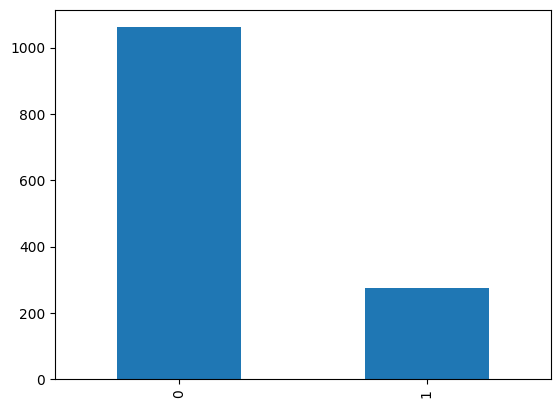

In [9]:
df['smoker'].value_counts().plot.bar()

In [10]:
# plt.figure(figsize=(10, 10))
# sns.barplot(x='sex', y='charges', data=df, estimator='mean')


# plt.title('Moyenne des charges en fonction du sexe')
# plt.xlabel('Sexe')
# plt.ylabel('Moyenne des charges')

# plt.show()

<AxesSubplot:>

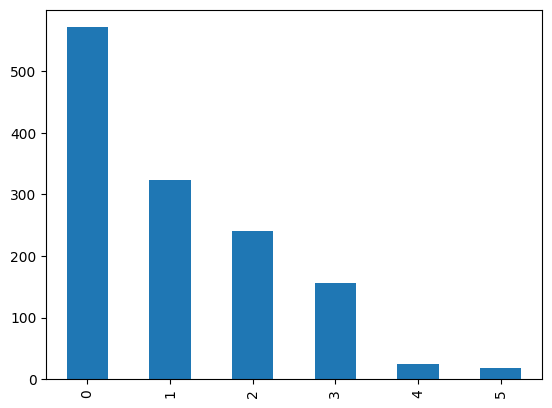

In [11]:
df['children'].value_counts().plot.bar()

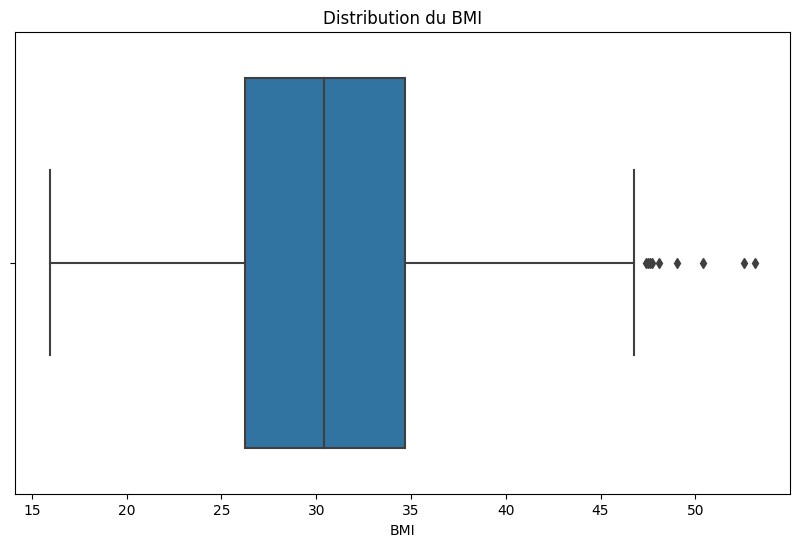

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi', data=df)

# Ajout de titres et d'étiquettes
plt.title('Distribution du BMI')
plt.xlabel('BMI')

# Affichage du graphique
plt.show()

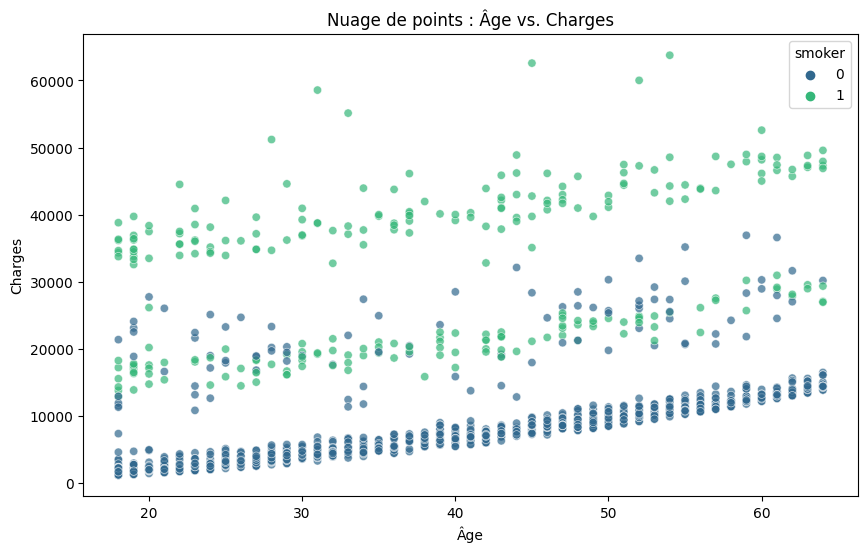

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='viridis', alpha=0.7)

# Ajout de titres et d'étiquettes
plt.title('Nuage de points : Âge vs. Charges')
plt.xlabel('Âge')
plt.ylabel('Charges')

# Affichage du graphique
plt.show()

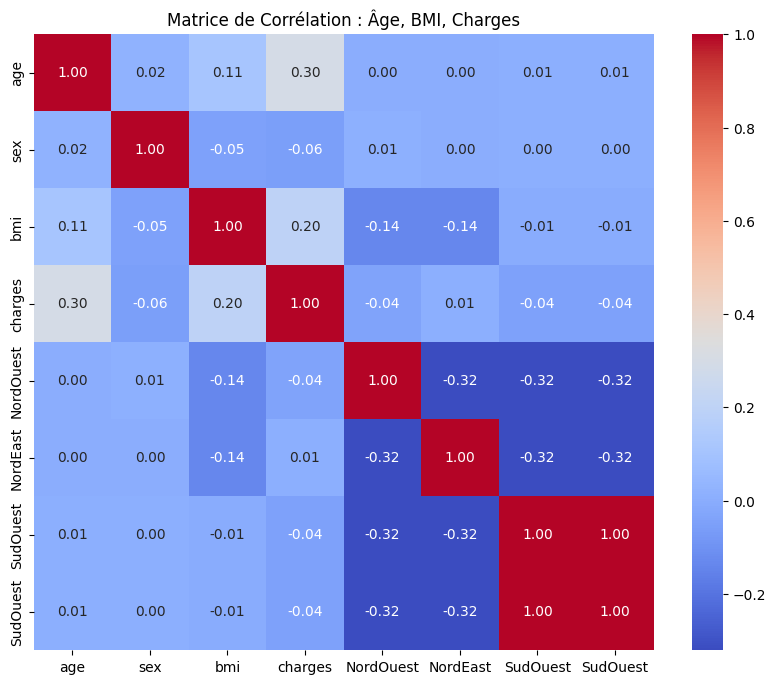

In [14]:
# Sélection des colonnes pertinentes
cols = ['age', 'sex','bmi', 'charges', 'NordOuest', 'NordEast', 'SudOuest','SudOuest']

# Création de la matrice de corrélation
correlation_matrix = df[cols].corr()

# Création d'une heatmap pour visualiser la corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajout de titres
plt.title('Matrice de Corrélation : Âge, BMI, Charges')

# Affichage de la heatmap
plt.show()

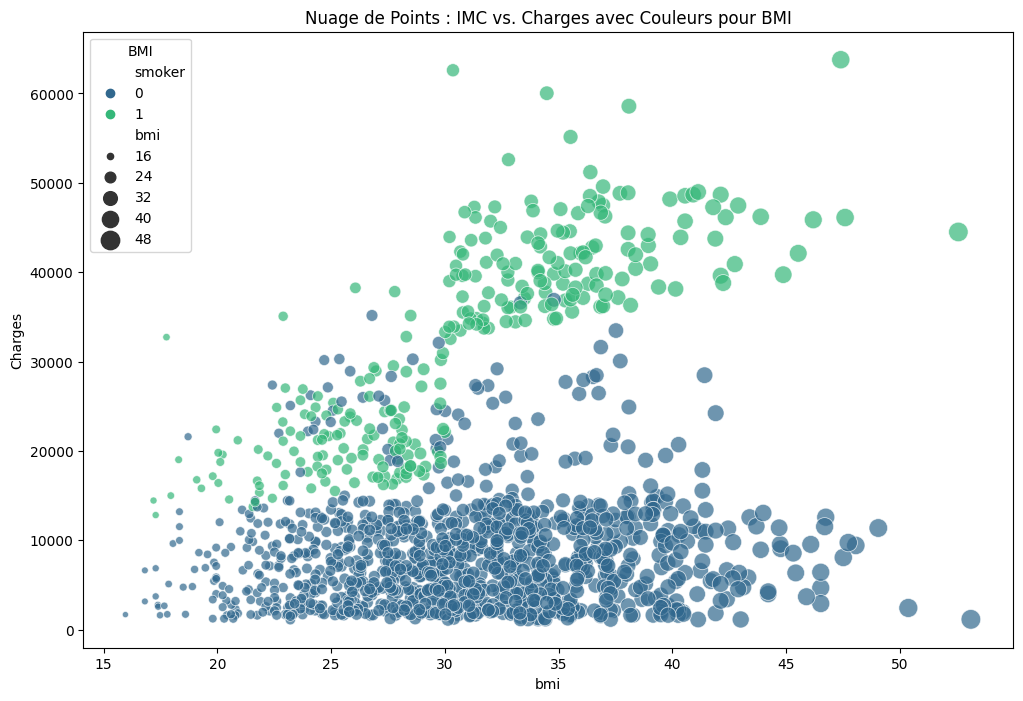

In [15]:
# Création d'un nuage de points avec des couleurs pour le BMI
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='bmi', y='charges',hue='smoker',  palette='viridis', data=df, size='bmi', sizes=(20, 200), alpha=0.7)

# Ajout de titres
plt.title('Nuage de Points : IMC vs. Charges avec Couleurs pour BMI')
plt.xlabel('bmi')
plt.ylabel('Charges')

# Ajout d'une légende pour la taille des points (BMI)
scatter_plot.legend(title='BMI')

# Affichage du graphique
plt.show()

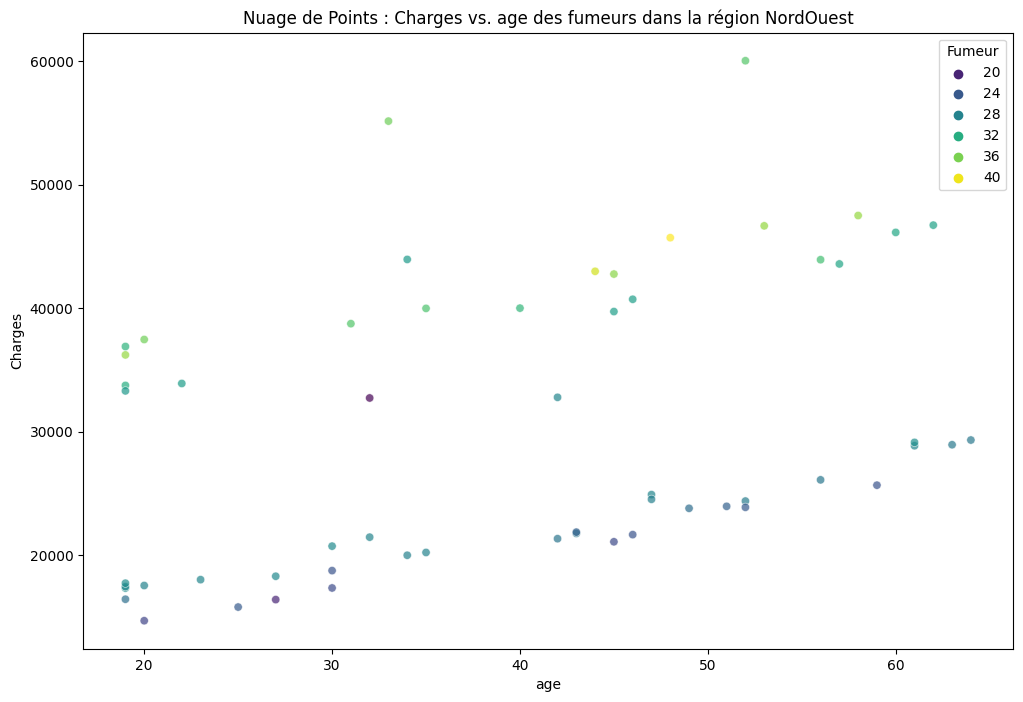

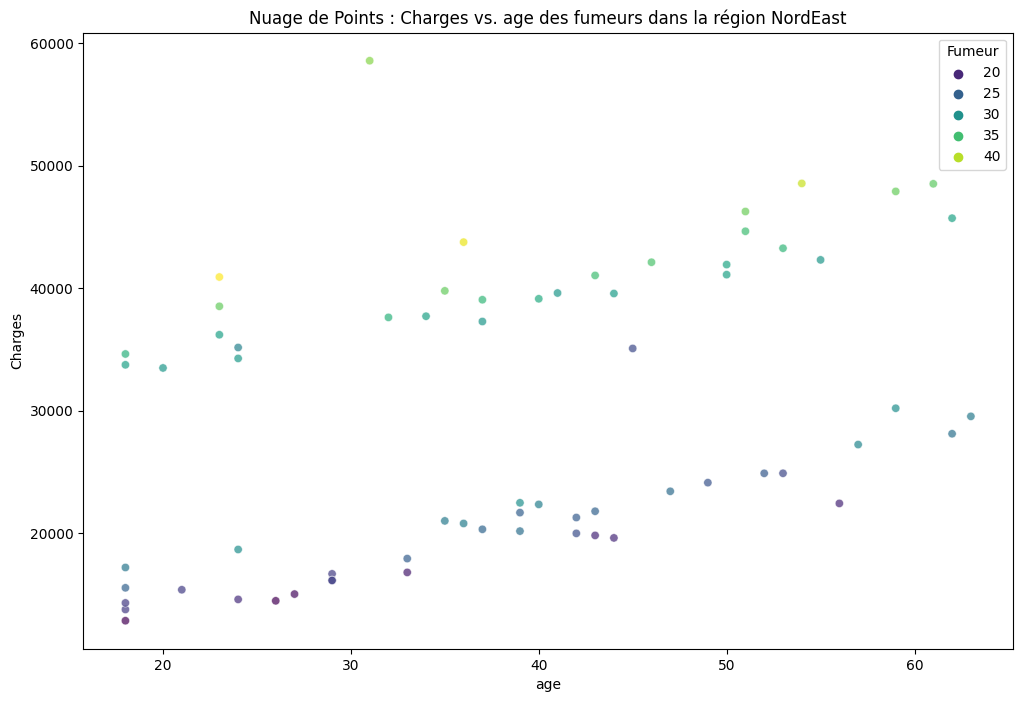

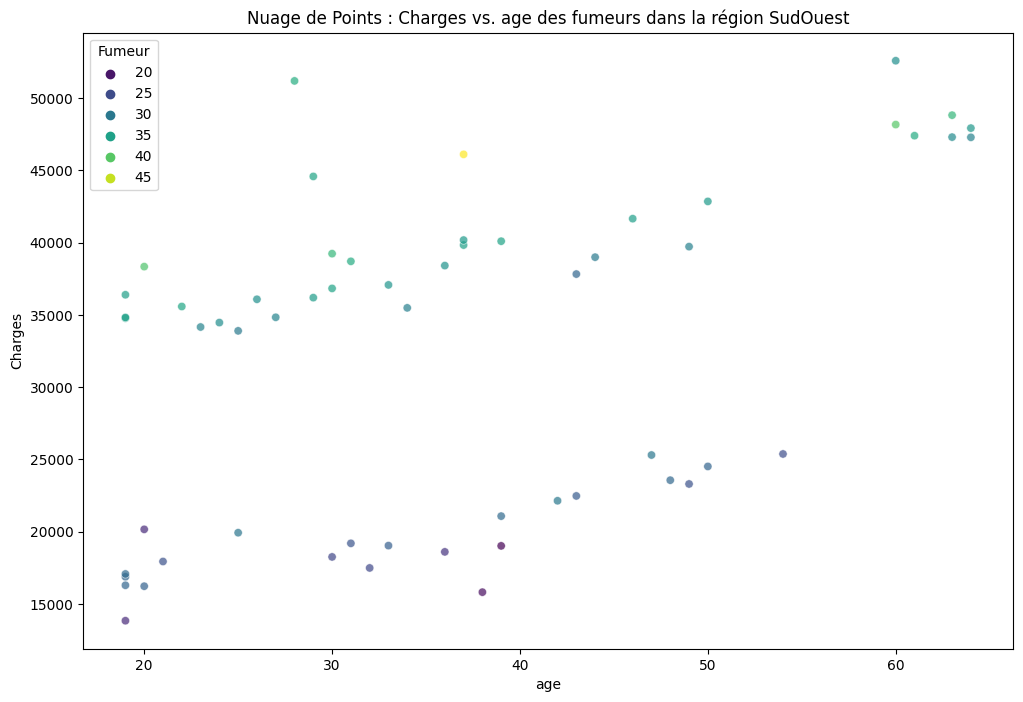

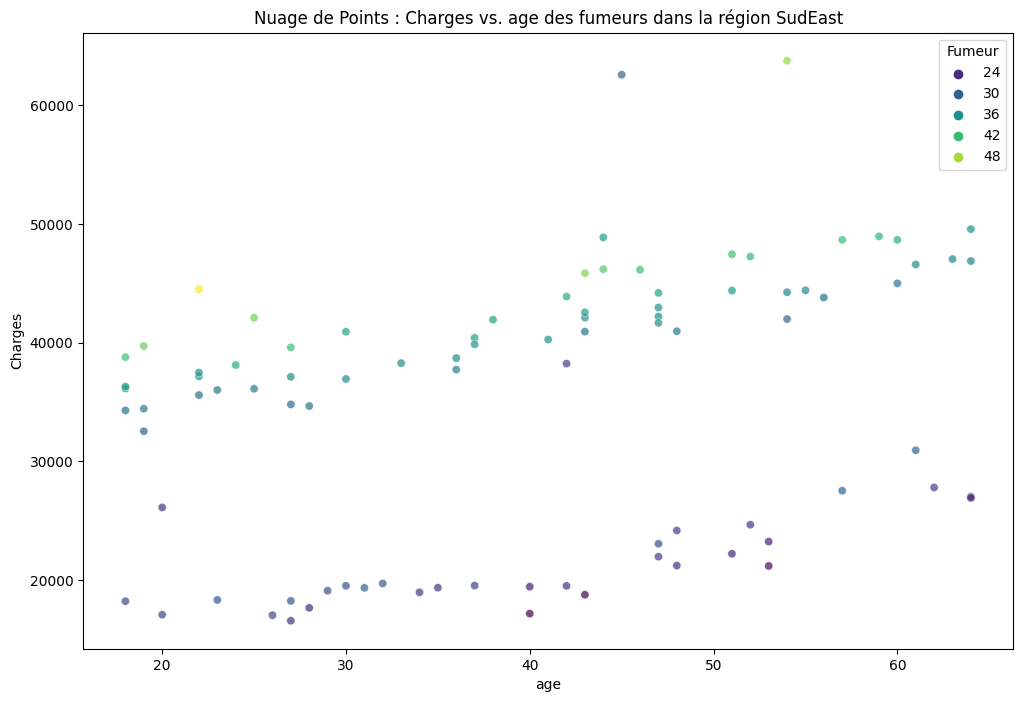

In [16]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

for region in regions:
    
    data_subset = df[(df[region] == 1) & (df['smoker'] == 1)]

    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(x='age', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

    plt.title(f'Nuage de Points : Charges vs. age des fumeurs dans la région {region}')
    plt.xlabel('age')
    plt.ylabel('Charges')

    scatter_plot.legend(title='Fumeur')
    plt.show()

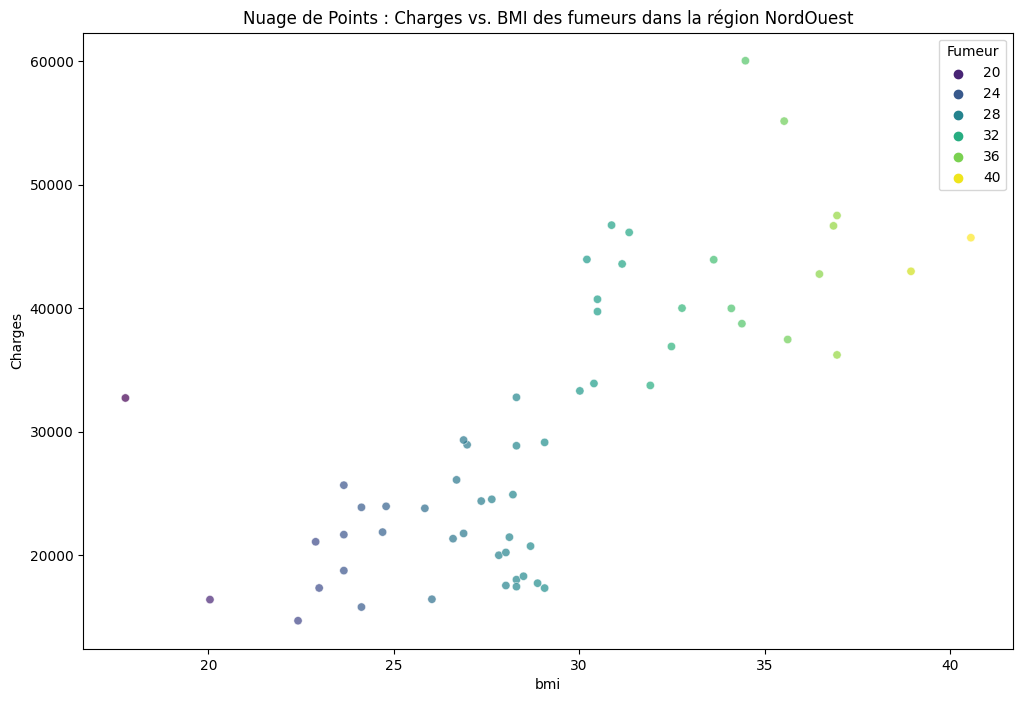

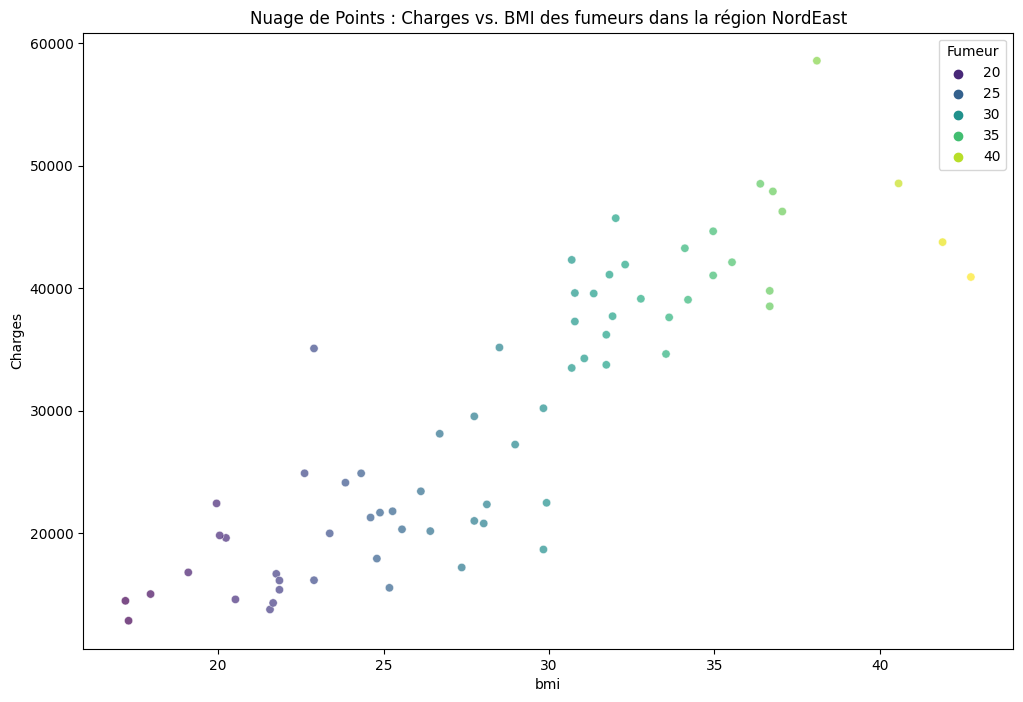

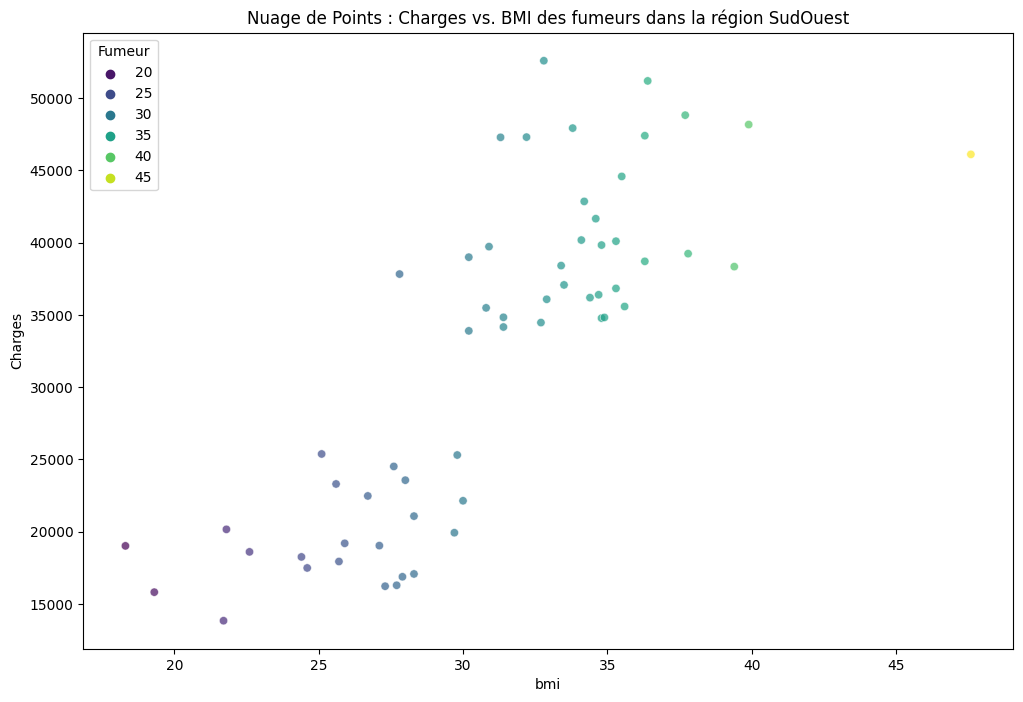

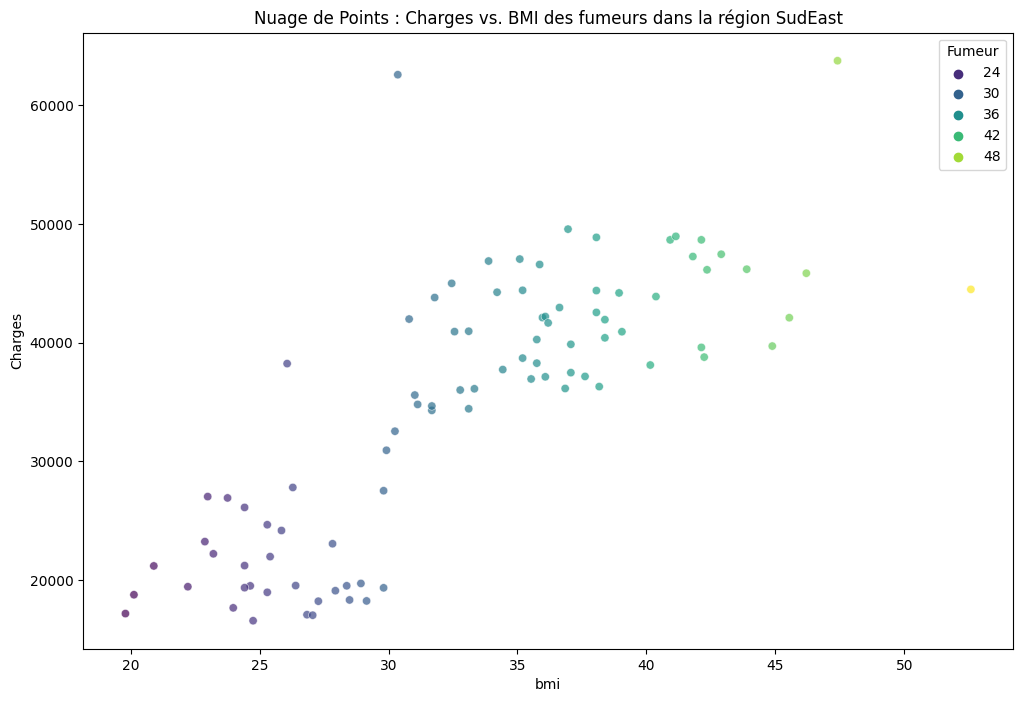

In [17]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

for region in regions:
    
    data_subset = df[(df[region] == 1) & (df['smoker'] == 1)]

    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(x='bmi', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

    plt.title(f'Nuage de Points : Charges vs. BMI des fumeurs dans la région {region}')
    plt.xlabel('bmi')
    plt.ylabel('Charges')

    scatter_plot.legend(title='Fumeur')
    plt.show()

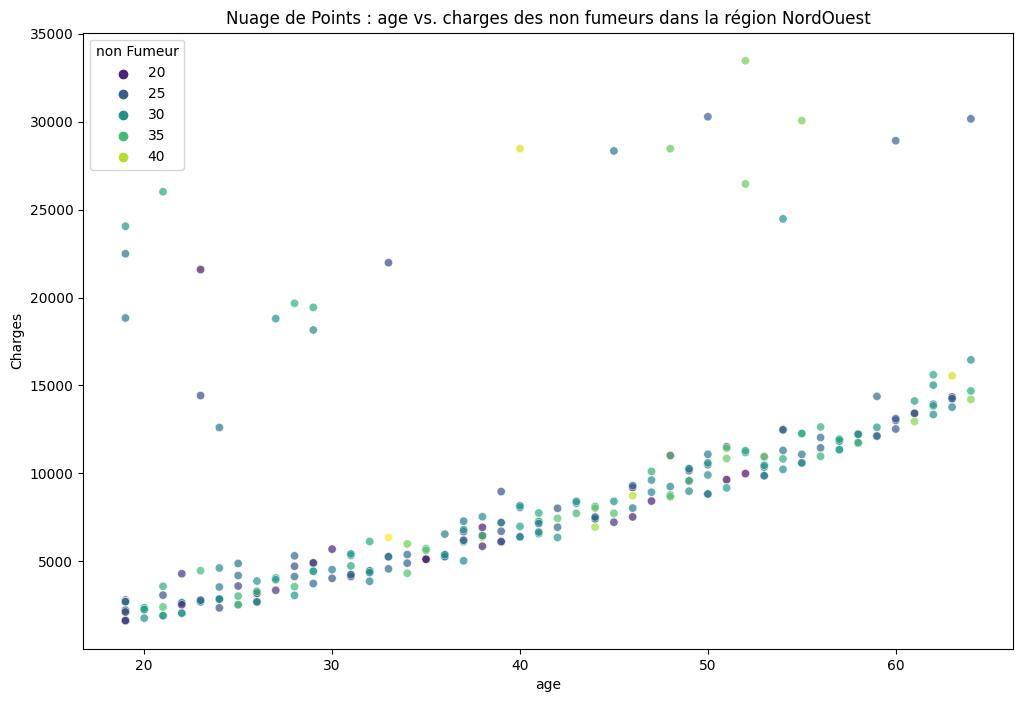

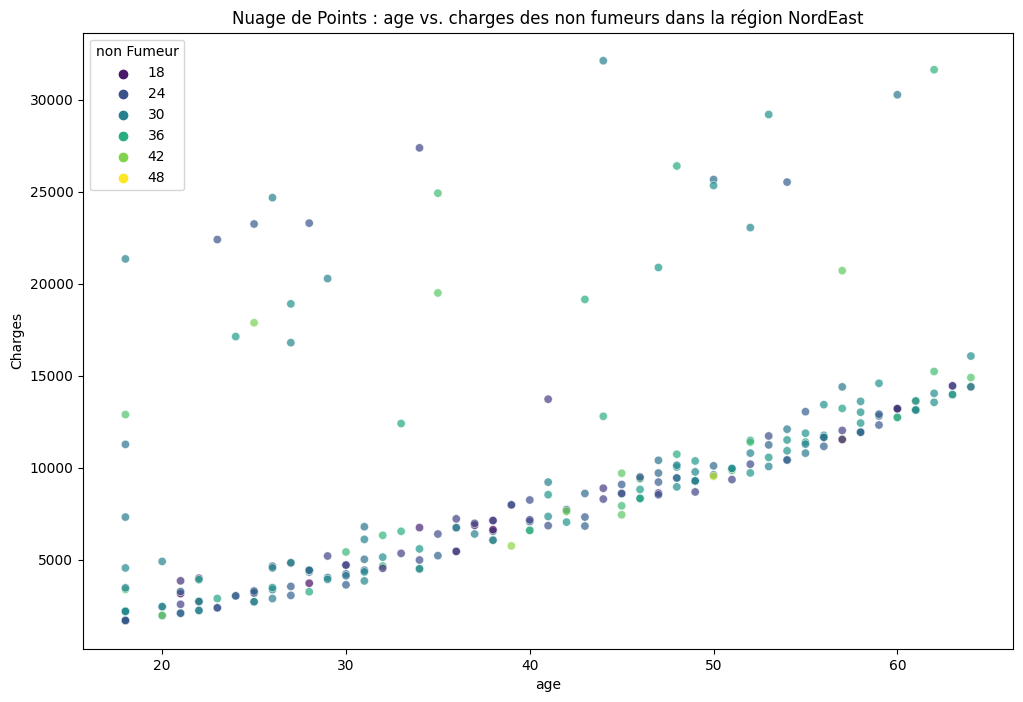

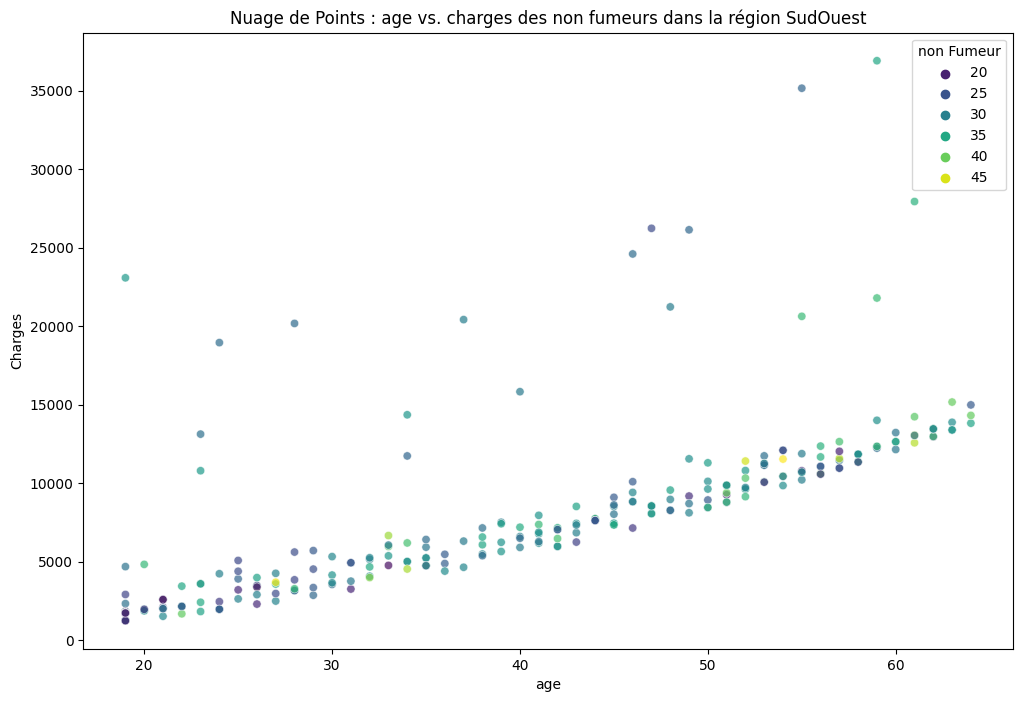

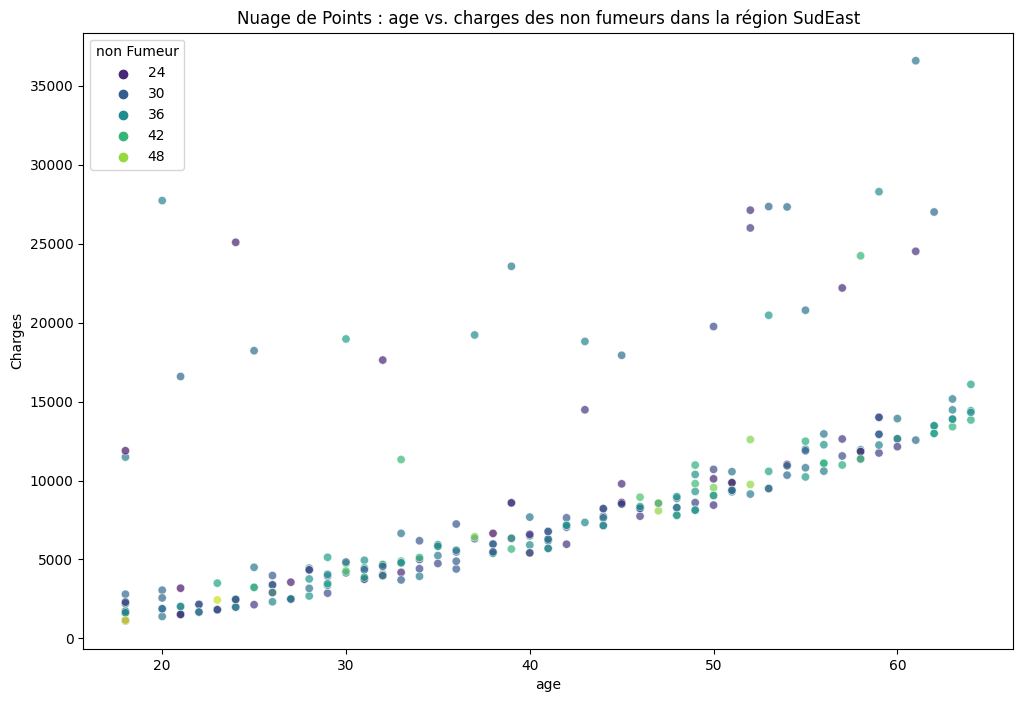

In [18]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

for region in regions:
    
    data_subset = df[(df[region] == 1) & (df['smoker'] == 0)]

    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(x='age', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

    plt.title(f'Nuage de Points : age vs. charges des non fumeurs dans la région {region}')
    plt.xlabel('age')
    plt.ylabel('Charges')

    scatter_plot.legend(title='non Fumeur')
    plt.show()

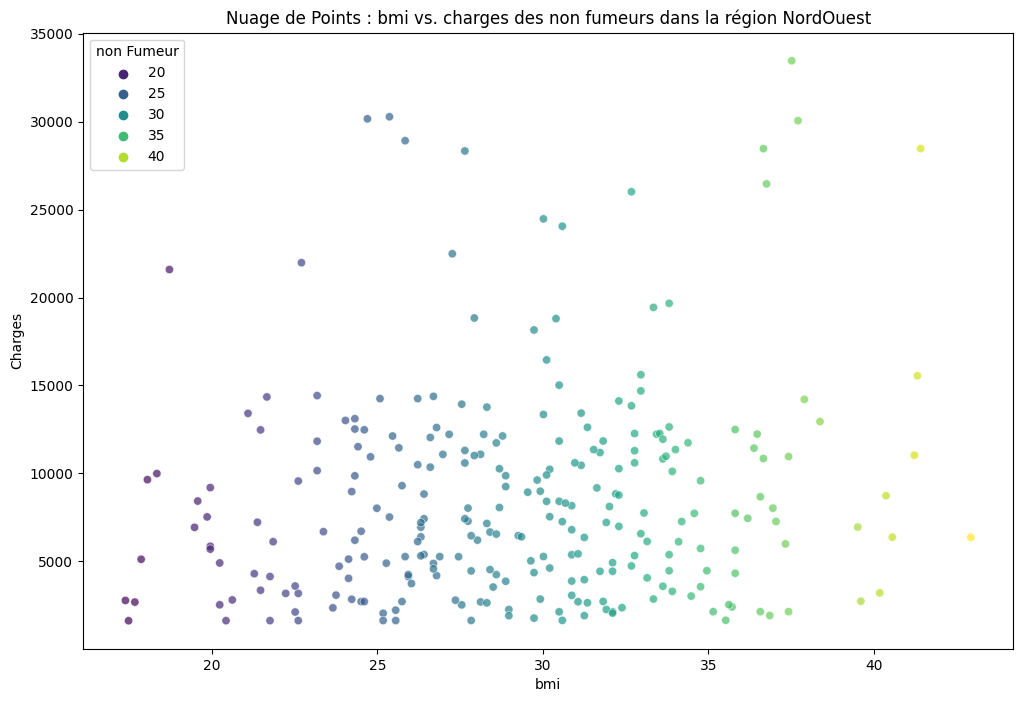

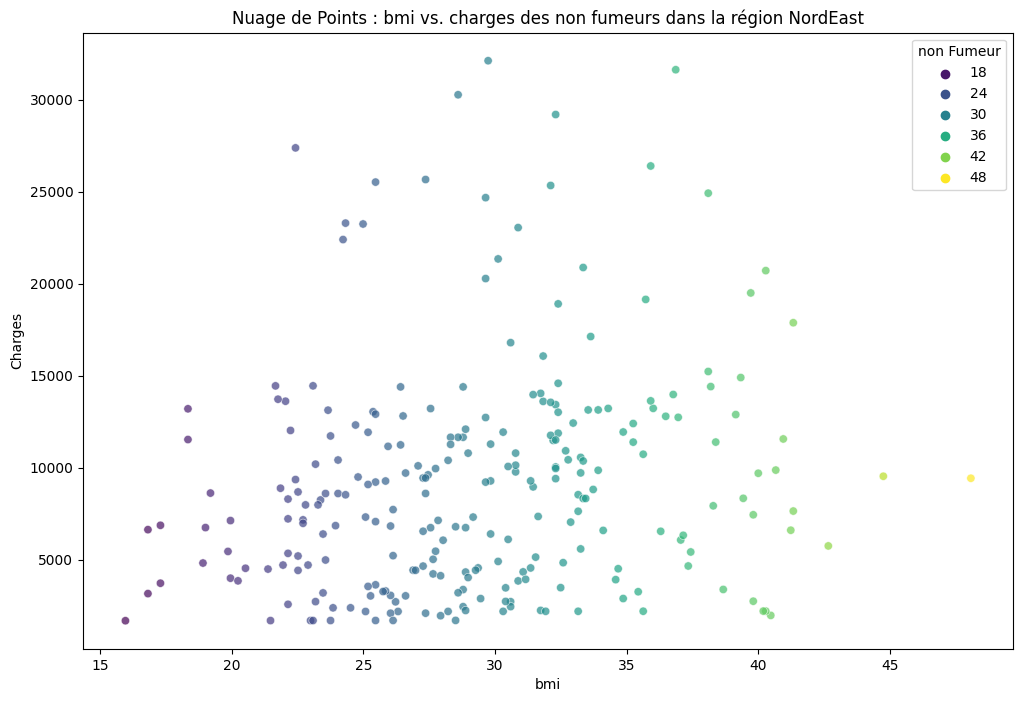

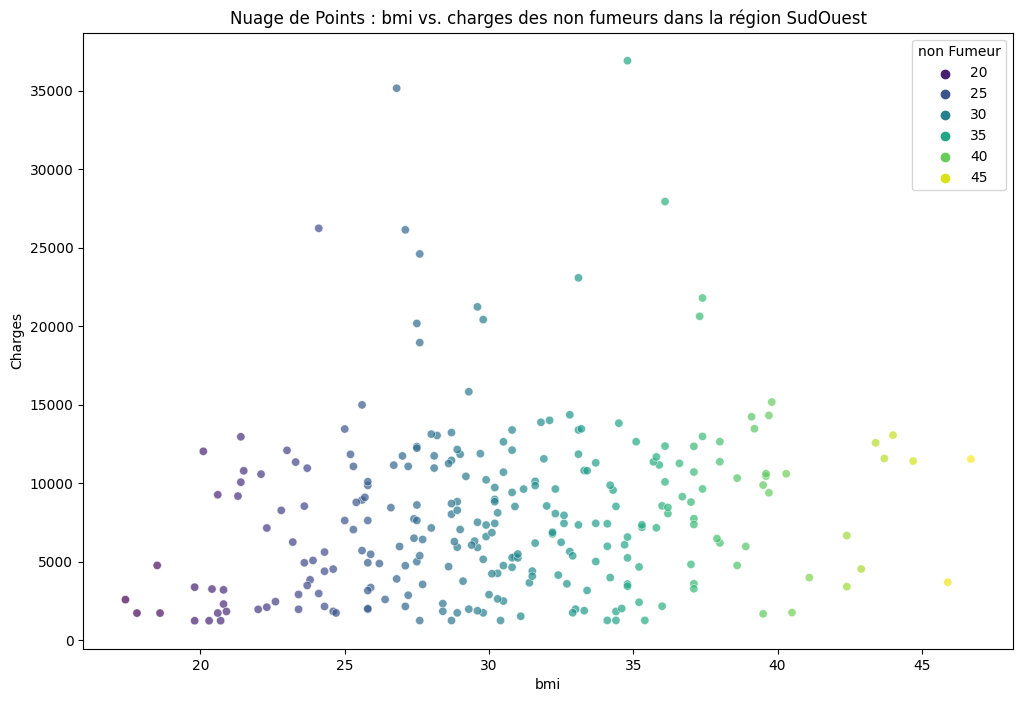

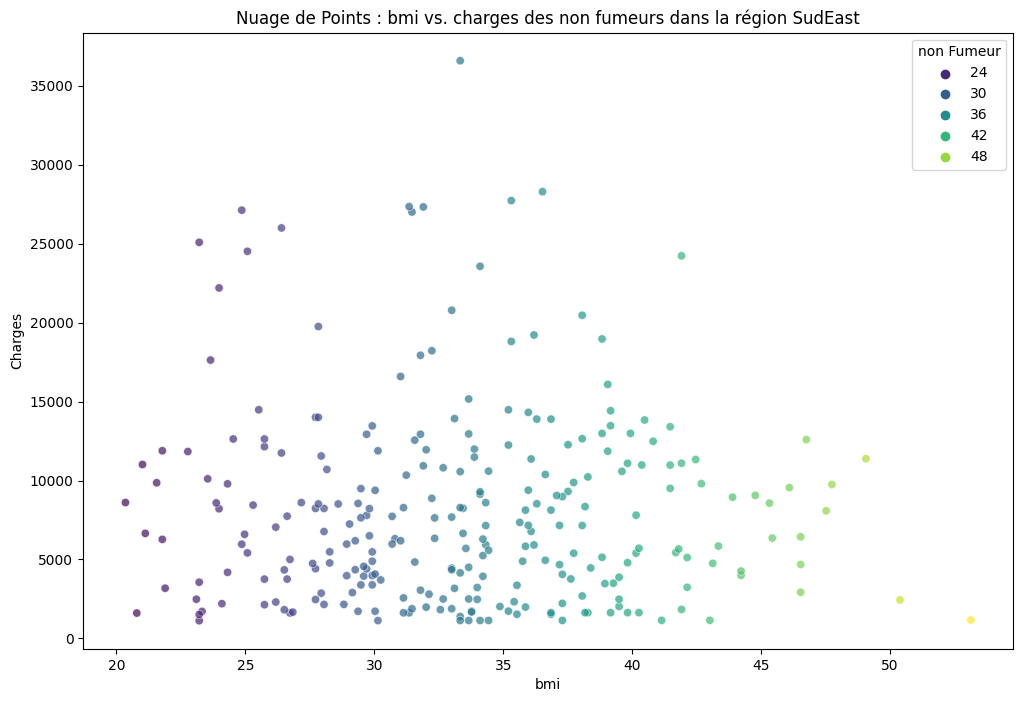

In [19]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']

for region in regions:
    
    data_subset = df[(df[region] == 1) & (df['smoker'] == 0)]

    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(x='bmi', y='charges', hue='bmi', palette='viridis', data=data_subset, sizes=(20, 200), alpha=0.7)

    plt.title(f'Nuage de Points : bmi vs. charges des non fumeurs dans la région {region}')
    plt.xlabel('bmi')
    plt.ylabel('Charges')

    scatter_plot.legend(title='non Fumeur')
    plt.show()

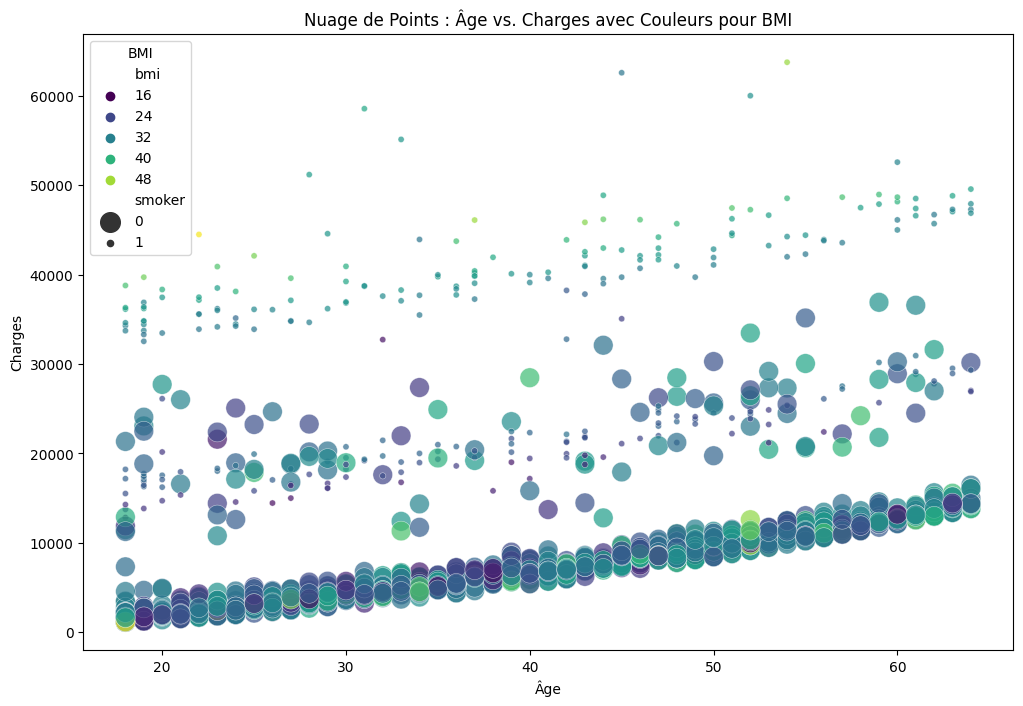

In [20]:
# Création d'un nuage de points avec des couleurs pour le BMI
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='age', y='charges', hue='bmi', palette='viridis', data=df, size='smoker', sizes=(20, 200), alpha=0.7)

# Ajout de titres
plt.title('Nuage de Points : Âge vs. Charges avec Couleurs pour BMI')
plt.xlabel('Âge')
plt.ylabel('Charges')

# Ajout d'une légende pour la taille des points (BMI)
scatter_plot.legend(title='BMI')

# Affichage du graphique
plt.show()

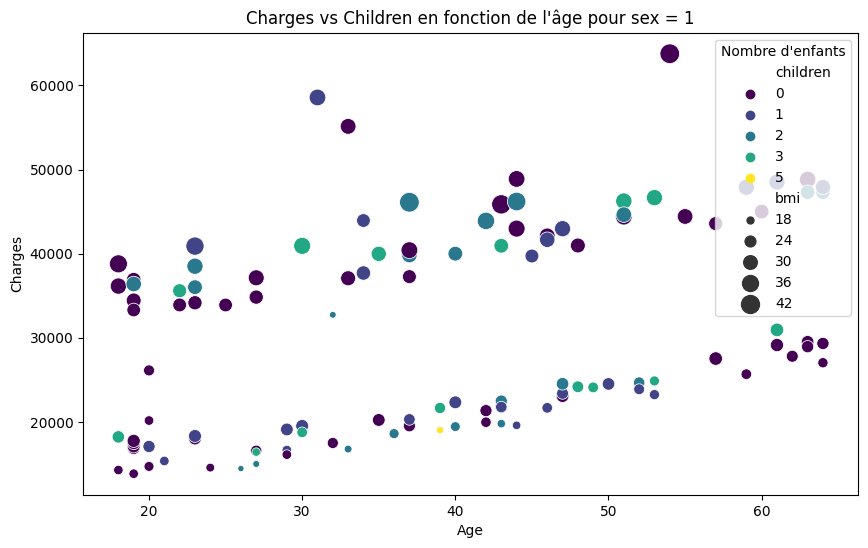

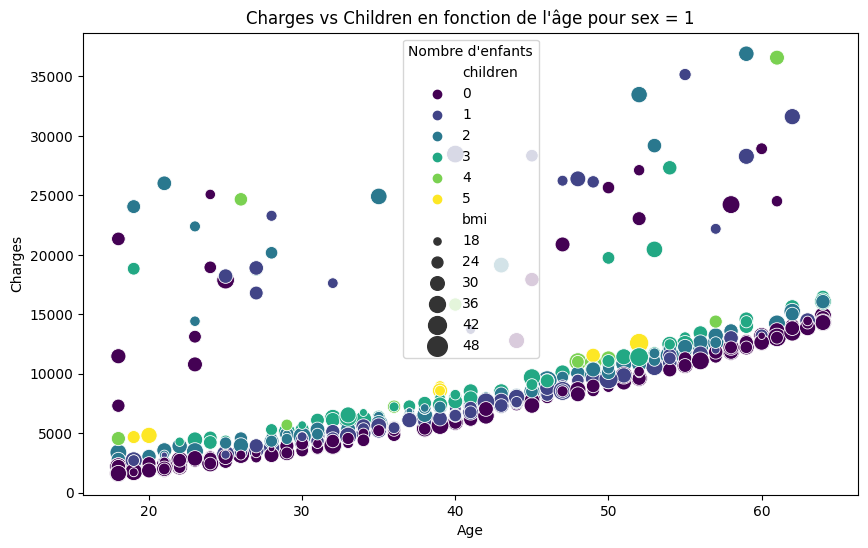

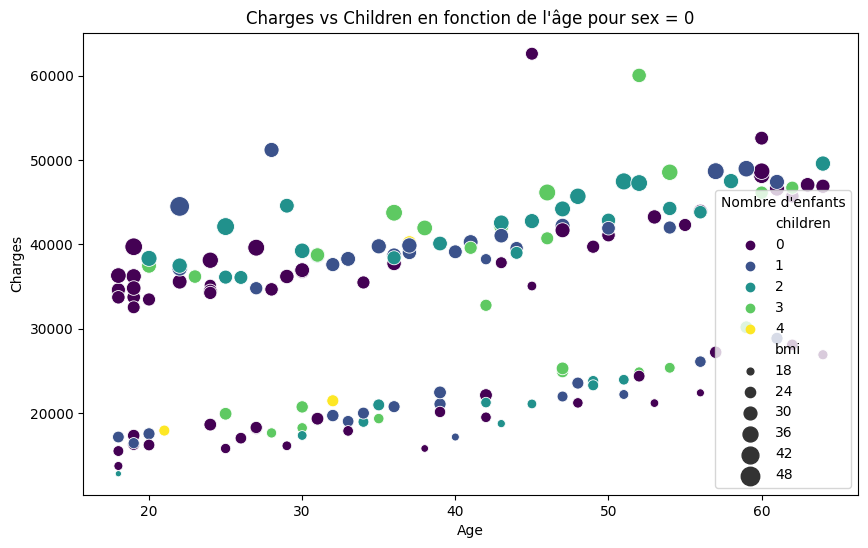

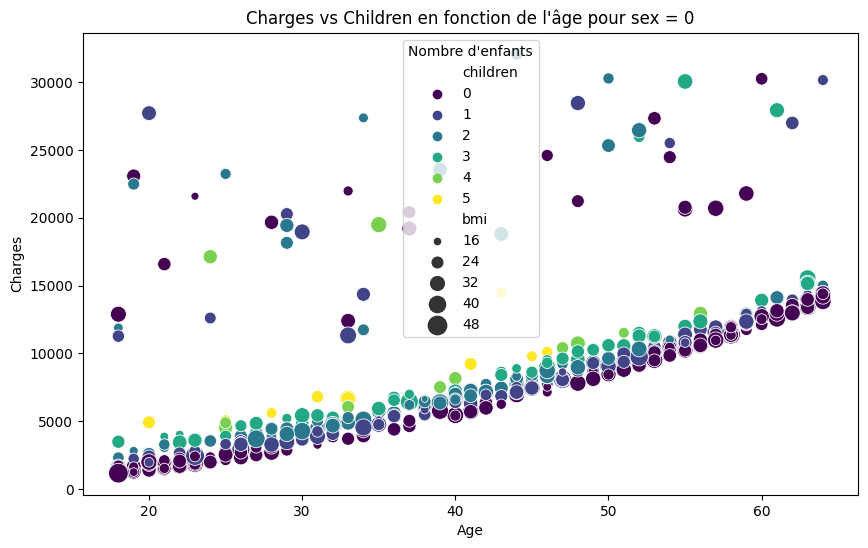

In [21]:
unique_sex_values = df['sex'].unique()
unique_smoker_values = df['smoker'].unique()

for sex_value in unique_sex_values:
    for smoker_value in unique_smoker_values:        
        data_filter_df = df[(df['sex'] == sex_value) & (df['smoker'] == smoker_value)]        
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='age', y='charges', hue='children', data=data_filter_df, palette='viridis', size='bmi', sizes=(20, 200))
        plt.title(f"Charges vs Children en fonction de l'âge pour sex = {sex_value}")
        plt.xlabel('Age')
        plt.ylabel('Charges')
        plt.legend(title="Nombre d'enfants")
        plt.show()
       

In [22]:
# from sklearn.linear_model import ElasticNet
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import RobustScaler
# import numpy as np

# selected_features = ['smoker', 'age', 'bmi', 'sex', 'children','charges']

# x = df[selected_features]
# y = df['charges']

# X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, train_size=0.85, random_state=42, stratify=x['smoker'])

# # Utilisez RobustScaler pour centrer et réduire les variables explicatives de manière robuste
# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# model = ElasticNet(alpha=0.001, l1_ratio=1, random_state=42)
# model.fit(X_train_scaled, y_train)

# y_pred_elasticnet = model.predict(X_test_scaled)

# r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
# mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
# rmse_elasticnet = np.sqrt(mse_elasticnet)

# print("Performance avec ElasticNet et RobustScaler:")
# print(f"R2 Score: {r2_elasticnet:.2f}")
# print(f"RMSE: {rmse_elasticnet:.2f}")


In [23]:

df['Insuffisance pondérale'] = (df['bmi'] < 18.5).astype(int)
df['Poids normal'] = ((df['bmi'] >= 18.5) & (df['bmi'] < 24.9)).astype(int)
df['Surpoids'] = ((df['bmi'] >= 24.9) & (df['bmi'] < 29.9)).astype(int)
df['Obésité de classe I (modérée)'] = ((df['bmi'] >= 29.9) & (df['bmi'] < 34.9)).astype(int)
df['Obésité de classe II (sévère)'] = (df['bmi'] >= 34.9).astype(int)

df['Jeune'] = (df['age'] < 21).astype(int)
df['Adulte'] = ((df['age'] >= 35) & (df['age'] < 50)).astype(int)
df['Adulte moyen'] = ((df['age'] >= 50) & (df['age'] < 65)).astype(int)
df['Senior'] = ((df['age'] >= 65) & (df['age'] < 75)).astype(int)
df['Très senior'] = (df['age'] >= 75).astype(int)

df['Homme'] = (df['sex'] == 0).astype(int)
df['Femme'] = (df['sex'] == 1).astype(int)


df = df[['age', 'Jeune', 'Adulte', 'Adulte moyen', 'Senior', 'Très senior', 'sex', 'Homme','Femme', 'bmi', 'Insuffisance pondérale', 'Poids normal', 'Surpoids', 'Obésité de classe I (modérée)', 'Obésité de classe II (sévère)', 'children', 'smoker', 'NordOuest', 'NordEast', 'SudOuest', 'SudEast', 'charges']]
# df = df[['Insuffisance pondérale', 'Poids normal', 'Surpoids', 'Obésité de classe I (modérée)', 'Obésité de classe II (sévère)']]
df.head(30)


,age,Jeune,Adulte,Adulte moyen,Senior,Très senior,sex,Homme,Femme,bmi,...,Surpoids,Obésité de classe I (modérée),Obésité de classe II (sévère),children,smoker,NordOuest,NordEast,SudOuest,SudEast,charges
0,19,1,0,0,0,0,1,0,1,27.900,...,1,0,0,0,1,0,0,1,0,16884.92
1,18,1,0,0,0,0,0,1,0,33.770,...,0,1,0,1,0,0,0,0,1,1725.55
2,28,0,0,0,0,0,0,1,0,33.000,...,0,1,0,3,0,0,0,0,1,4449.46
3,33,0,0,0,0,0,0,1,0,22.705,...,0,0,0,0,0,1,0,0,0,21984.47
4,32,0,0,0,0,0,0,1,0,28.880,...,1,0,0,0,0,1,0,0,0,3866.86
5,31,0,0,0,0,0,1,0,1,25.740,...,1,0,0,0,0,0,0,0,1,3756.62
6,46,0,1,0,0,0,1,0,1,33.440,...,0,1,0,1,0,0,0,0,1,8240.59
7,37,0,1,0,0,0,1,0,1,27.740,...,1,0,0,3,0,1,0,0,0,7281.51
8,37,0,1,0,0,0,0,1,0,29.830,...,1,0,0,2,0,0,1,0,0,6406.41
9,60,0,0,1,0,0,1,0,1,25.840,...,1,0,0,0,0,1,0,0,0,28923.14


In [24]:
data_cleaned_path = "Clean_Dataset_Brief.csv"
df_cleaned = pd.read_csv(data_cleaned_path)

df_cleaned.head()



,age,Jeune,Adulte,Adulte_moyen,Senior,Très_senior,sex,is_female,is_male,bmi,...,children_4,children_5,smoker,is_smoker,is_not_smoker,is_southwest,is_southeast,is_northwest,is_northeast,charges
0,19,0,1,0,0,0,1,1,0,27.900,...,0,0,1,1,0,1,0,0,0,16884.92400
1,18,0,1,0,0,0,0,0,1,33.770,...,0,0,0,0,1,0,1,0,0,1725.55230
2,28,0,1,0,0,0,0,0,1,33.000,...,0,0,0,0,1,0,1,0,0,4449.46200
3,33,0,1,0,0,0,0,0,1,22.705,...,0,0,0,0,1,0,0,1,0,21984.47061
4,32,0,1,0,0,0,0,0,1,28.880,...,0,0,0,0,1,0,0,1,0,3866.85520


LASSO

In [36]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


# selected_features = ['Jeune', 'Adulte', 'Adulte moyen', 'Senior', 'Très senior','Homme','Femme','Insuffisance pondérale', 'Poids normal', 'Surpoids', 'Obésité de classe I (modérée)', 'Obésité de classe II (sévère)', 'children', 'smoker', 'NordOuest', 'NordEast', 'SudOuest', 'SudEast']
# selected_features = ['Jeune', 'Adulte', 'Adulte moyen', 'Senior', 'Très senior','Insuffisance pondérale', 'Poids normal', 'Surpoids', 'Obésité de classe I (modérée)', 'Obésité de classe II (sévère)', 'smoker']
# selected_features = ["age", 'bmi','Jeune','Adulte', 'Adulte_moyen', 'Senior', 'Très_senior', 'is_female', 'is_male', 'Insuffisance pondérale', 'Poids_normal', 'Surpoids', 'Obésité_de_classe_I_(modérée)', 'Obésité_de_classe_II_(sévère)', 'children','no_children','1_child','2_children','3_children','4_children','5_children', 'is_smoker', 'is_not_smoker', 'is_southwest', 'is_southeast', 'is_northwest', 'is_northeast']
# selected_features = selected_features = ["age", 'bmi','Jeune','Adulte', 'Adulte_moyen', 'Senior', 'Très_senior', 'is_female', 'is_male', 'Insuffisance pondérale', 'Poids_normal', 'Surpoids', 'Obésité_de_classe_I_(modérée)', 'Obésité_de_classe_II_(sévère)', 'children','no_children','1_child','2_children','3_children','4_children','5_children', 'is_smoker', 'is_not_smoker', 'is_southwest', 'is_southeast', 'is_northwest', 'is_northeast']
selected_features = ['age', 'Jeune', 'Adulte', 'Adulte_moyen', 'Senior', 'Très_senior', 'sex', 'is_female', 'is_male', 'bmi', 'Insuffisance pondérale', 'Poids_normal', 'Surpoids', 'Obésité_de_classe_I_(modérée)', 'Obésité_de_classe_II_(sévère)', 'children', 'children_0', 'children_1', 'children_2', 'children_3', 'children_4', 'children_5', 'smoker', 'is_smoker', 'is_not_smoker', 'is_southwest', 'is_southeast', 'is_northwest', 'is_northeast']
x = df_cleaned[selected_features]
y = df_cleaned['charges']

X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, train_size=0.85, random_state=42, stratify=x['is_smoker'])

param_grid = {'lasso__alpha': [115,240,250]}

model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    Lasso(random_state=42,  max_iter=100000)
)

grid_search = GridSearchCV(model, param_grid,cv =5)
grid_search.fit(X_train, y_train)
grid_scrore = grid_search.score(X_train, y_train)
best_alpha = grid_search.best_params_['lasso__alpha']
y_pred = grid_search.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(grid_search.best_params_)
print("Performance du modèle final:")
print(grid_scrore)
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


{'lasso__alpha': 240}
Performance du modèle final:
0.8639261895087931
R2 Score: 0.8807
RMSE: 4166.14


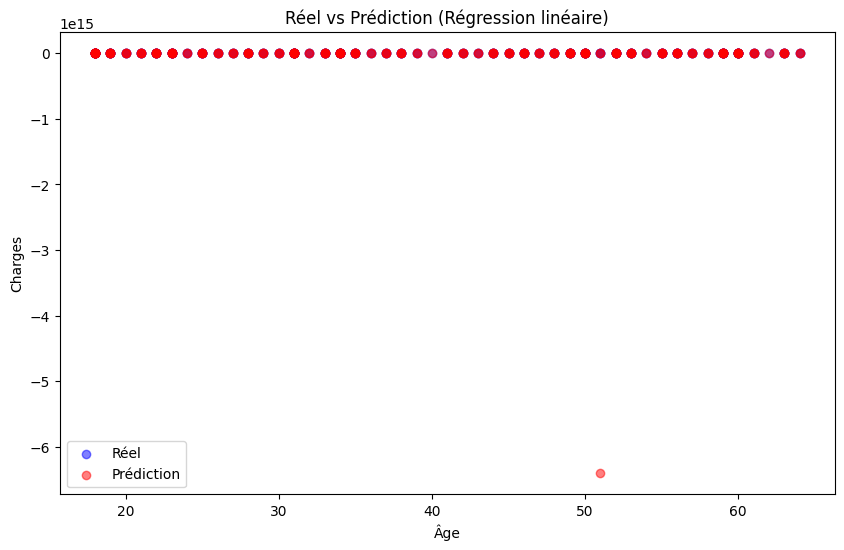

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test['age'], y_test, color='blue', label='Réel', alpha=0.5)
plt.scatter(X_test['age'], y_pred, color='red', label='Prédiction', alpha=0.5)

plt.title('Réel vs Prédiction (Régression linéaire)')
plt.xlabel('Âge')
plt.ylabel('Charges')
plt.legend()

plt.show()

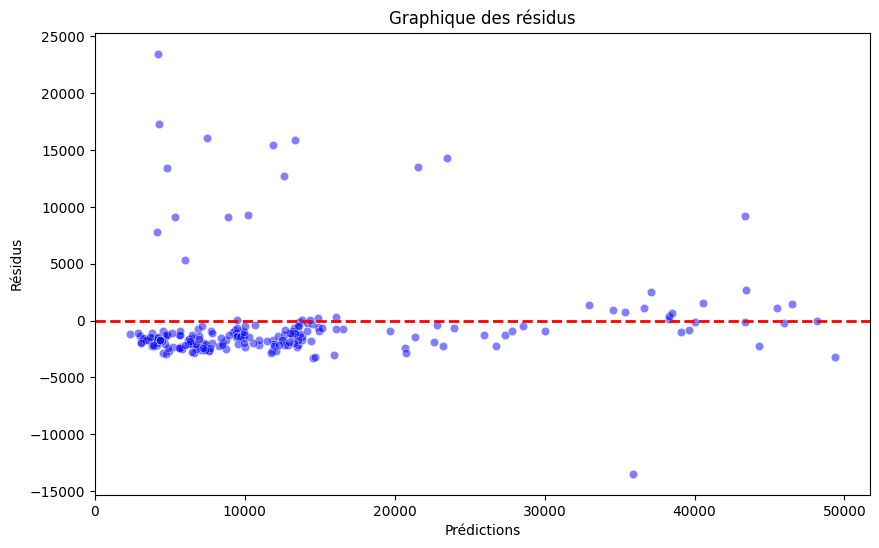

In [37]:
residuals = y_test - y_pred

# Tracer le graphique des résidus
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Graphique des résidus')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Sélection des caractéristiques
selected_features = ['age', 'sex', 'Insuffisance pondérale', 'Poids normal', 'Surpoids', 'Obésité de classe I (modérée)', 'Obésité de classe II (sévère)', 'children', 'smoker', 'NordOuest', 'NordEast', 'SudOuest', 'SudEast']

# Séparation des données en ensemble d'entraînement et de test
x = df[selected_features]
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, train_size=0.85, random_state=42, stratify=x['smoker'])

# Création du modèle Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_rf = model_rf.predict(X_test)

# Calcul des métriques
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Performance du modèle Random Forest :")
print(f"R2 Score: {r2_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")


Performance du modèle Random Forest :
R2 Score: 0.82
RMSE: 5162.72
